In [ ]:
# Análise do Dataset: Personal Key Indicators of Heart - Indicadores de Cardiopatia
# Objetivo: Identificar as correlações existentes entre alguns fatores de hábitos pessoais e aspectos biológicos com a incidência de cardiopatias   
# Fonte dos dados: https://www.cdc.gov/brfss/annual_data/annual_2020.html in Kaggle (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)
# O dataset original possui 400000 respostas, o número analisado é de 319795, após o tratamento.
# Realizado em março/2022.

In [57]:
# Importação das Bibliotecas: Pandas, Numpy, Matplotlib e Seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sb
import random as rd

In [ ]:
# Início: Análise exploratória
# Leitura do arquivo

In [117]:
heart = pd.read_csv('heart_2020.csv')

In [118]:
heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [55]:
# Quantidade de linhas e colunas
heart.shape

(319795, 18)

In [56]:
# identificação de valores nulos
heart.isnull().any()

HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [6]:
# Tipagem das colunas
heart.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [58]:
# Descrição das colunas do tipo float
# Percebe-se que em média, o IMC está acima do saudável (que é 18,5 a 24,9)
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


C:\Users\deeww\AppData\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI'>

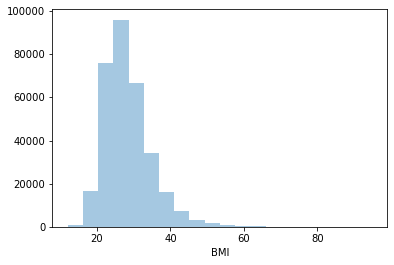

In [59]:
# Histograma: BMI (IMC) da amostra
# O gráfico será substituído dentro da biblioteca Seaborn.
sb.distplot(heart['BMI'],kde=False,bins=20)

In [60]:
# Descrição das colunas do tipo object (strings)
heart.describe(include=['object'])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [62]:
# Coletando informações sobre as colunas categóricas e numéricas
heart_cat = heart.select_dtypes('object')
heart_num = heart.select_dtypes('float64')
heart_cat.info(), heart_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   HeartDisease      319795 non-null  object
 1   Smoking           319795 non-null  object
 2   AlcoholDrinking   319795 non-null  object
 3   Stroke            319795 non-null  object
 4   DiffWalking       319795 non-null  object
 5   Sex               319795 non-null  object
 6   AgeCategory       319795 non-null  object
 7   Race              319795 non-null  object
 8   Diabetic          319795 non-null  object
 9   PhysicalActivity  319795 non-null  object
 10  GenHealth         319795 non-null  object
 11  Asthma            319795 non-null  object
 12  KidneyDisease     319795 non-null  object
 13  SkinCancer        319795 non-null  object
dtypes: object(14)
memory usage: 34.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (tot

(None, None)

array([[<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'PhysicalHealth'}>],
       [<AxesSubplot:title={'center':'MentalHealth'}>,
        <AxesSubplot:title={'center':'SleepTime'}>]], dtype=object)

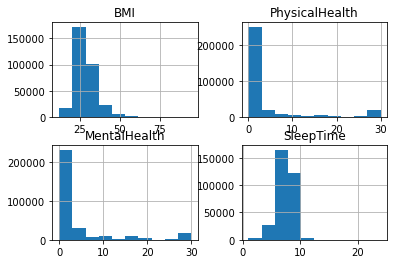

In [63]:
# Histograma (variáveis numéricas): IMC, tempo de sono, Saúde física e mental
heart_num.hist()

In [64]:
# Localizando no dataset: 5 primeiros e 5 últimos registros: IMC x Cardiopatia
heart.iloc[:,0:2]

,HeartDisease,BMI
0,No,16.60
1,No,20.34
2,No,26.58
3,No,24.21
4,No,23.71
...,...,...
319790,Yes,27.41
319791,No,29.84
319792,No,24.24
319793,No,32.81


In [ ]:
heart_1=heart.iloc[:,0:2]

array([[<AxesSubplot:title={'center':'BMI'}>]], dtype=object)

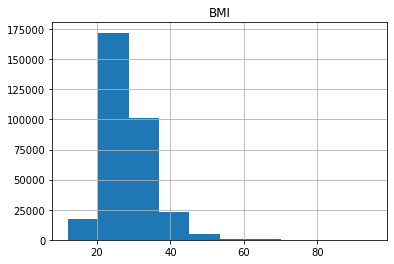

In [67]:
# Histograma IMC
heart_1.hist()

In [68]:
# Ordenando os registros de IMC: 5 maiores e 5 menores x cardiopatia
heart_1.sort_values(by=['BMI'])

,HeartDisease,BMI
69662,No,12.02
205511,No,12.02
113373,No,12.08
51637,No,12.13
81754,No,12.16
...,...,...
156093,No,92.53
249715,No,93.86
104267,No,93.97
242834,No,94.66


In [69]:
# Estatística básica do IMC: Percebe-se que a média está acima do saudável que é IMC=24,5.
heart_1.describe()

,BMI
count,319795.000000
mean,28.325399
std,6.356100
min,12.020000
25%,24.030000
50%,27.340000
75%,31.420000
max,94.850000


In [70]:
df = heart

In [71]:
# Frequencia de registros de IMC
df['BMI'].value_counts()

26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
50.43       1
51.48       1
37.01       1
13.08       1
81.46       1
Name: BMI, Length: 3604, dtype: int64

In [72]:
BMI = df['BMI'].value_counts()

In [73]:
# Ordenando a frequencia de registros de IMC
BMI.sort_values()

81.46       1
43.81       1
53.98       1
18.00       1
47.29       1
         ... 
27.12    2525
24.41    2696
27.44    2723
27.46    2767
26.63    3762
Name: BMI, Length: 3604, dtype: int64

In [74]:
# Correlação entre as variáveis numéricas (Observa-se que a correalção mais alta é entre a saúde física e mental)
correlacao = heart.corr()
correlacao

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


<AxesSubplot:>

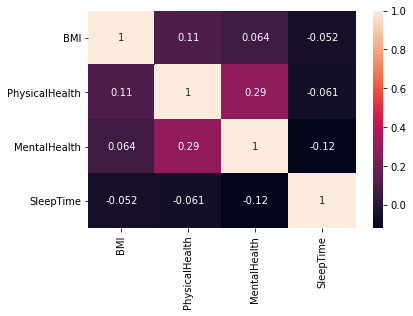

In [75]:
# Gráfico de calor: Variáveis numéricas
sb.heatmap(correlacao,annot=True)

In [91]:
heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [11]:
heart = pd.read_csv('heart_2020.csv')

In [20]:
#Frequencia de registros de Idade
heart['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [21]:
#Frequencia de registros de fumantes
heart['Smoking'].value_counts()

No     187887
Yes    131908
Name: Smoking, dtype: int64

In [22]:
#Frequencia de registros de pessoas com cardiopatia
heart['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [23]:
#Frequencia de registros de derrame
heart['Stroke'].value_counts()

No     307726
Yes     12069
Name: Stroke, dtype: int64

In [24]:
#Frequencia de registros de pessoas que consomem álcool
heart['AlcoholDrinking'].value_counts()

No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64

In [25]:
#Frequencia de registros com problemas renais
heart['KidneyDisease'].value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

In [13]:
#Frequencia de registros de pessoas com diabete
heart['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [14]:
#Histograma: Pessoas com diabete
heart[['Diabetic']] = heart[['Diabetic']].apply(lambda x:x.map({'Yes':1,'No':0, 'Yes (during pregnancy)':1, 'No, borderline diabetes': 0}))

<AxesSubplot:>

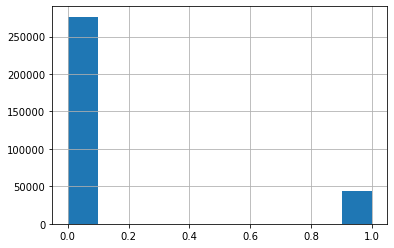

In [15]:
heart['Diabetic'].hist()

In [119]:
#Criação do Dataframe com resultados boleanos: transformação de 'yes' em '1' e 'no' em '0'.
heart_bol = heart

In [121]:
d = {
    "Yes" : 1,
    "No" : 0
}

In [122]:
#Transformando colunas objects em boleanos
heart_bol["Smoking_bol"]          = heart_bol['Smoking'].map(d)
heart_bol["Stroke_bol"]           = heart_bol['Stroke'].map(d)
heart_bol["Asthma_bol"]           = heart_bol['Asthma'].map(d)
heart_bol["SkinCancer_bol"]       = heart_bol['SkinCancer'].map(d)
heart_bol["PhysicalActivity_bol"] = heart_bol['PhysicalActivity'].map(d)
heart_bol["Diabetic_bol"]         = heart_bol['Diabetic'].map(d)
heart_bol["AlcoholDrinking_bol"]  = heart_bol['AlcoholDrinking'].map(d)
heart_bol["KidneyDisease_bol"]    = heart_bol['KidneyDisease'].map(d)
heart_bol["HeartDisease_bol"]     = heart_bol['HeartDisease'].map(d)

In [125]:
heart_bol

,BMI,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,GenHealth,SleepTime,Smoking_bol,Stroke_bol,Asthma_bol,SkinCancer_bol,PhysicalActivity_bol,Diabetic_bol,AlcoholDrinking_bol,KidneyDisease_bol,HeartDisease_bol
0,16.60,3.0,30.0,No,Female,55-59,White,Very good,5.0,1,0,1,1,1,1.0,0,0,0
1,20.34,0.0,0.0,No,Female,80 or older,White,Very good,7.0,0,1,0,0,1,0.0,0,0,0
2,26.58,20.0,30.0,No,Male,65-69,White,Fair,8.0,1,0,1,0,1,1.0,0,0,0
3,24.21,0.0,0.0,No,Female,75-79,White,Good,6.0,0,0,0,1,0,0.0,0,0,0
4,23.71,28.0,0.0,Yes,Female,40-44,White,Very good,8.0,0,0,0,0,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,Yes,Male,60-64,Hispanic,Fair,6.0,1,0,1,0,0,1.0,0,0,1
319791,29.84,0.0,0.0,No,Male,35-39,Hispanic,Very good,5.0,1,0,1,0,1,0.0,0,0,0
319792,24.24,0.0,0.0,No,Female,45-49,Hispanic,Good,6.0,0,0,0,0,1,0.0,0,0,0
319793,32.81,0.0,0.0,No,Female,25-29,Hispanic,Good,12.0,0,0,0,0,0,0.0,0,0,0


In [124]:
#Apagar colunas
del heart_bol['Smoking']
del heart_bol['Stroke']
del heart_bol['Asthma']
del heart_bol['SkinCancer']
del heart_bol['PhysicalActivity']
del heart_bol['Diabetic']
del heart_bol['AlcoholDrinking']
del heart_bol['KidneyDisease']
del heart_bol["HeartDisease"]

In [126]:
#Renomear colunas
heart_bol=heart_bol.rename(columns={'HeartDisease_bol':'HeartDisease'})
heart_bol=heart_bol.rename(columns={'Smoking_bol':'Smoking'})
heart_bol=heart_bol.rename(columns={'Stroke_bol':'Stroke'})
heart_bol=heart_bol.rename(columns={'Asthma_bol':'Asthma'})
heart_bol=heart_bol.rename(columns={'SkinCancer_bol':'SkinCancer'})
heart_bol=heart_bol.rename(columns={'PhysicalActivity_bol':'PhysicalActivity'})
heart_bol=heart_bol.rename(columns={'Diabetic_bol':'Diabetic'})
heart_bol=heart_bol.rename(columns={'AlcoholDrinking_bol':'AlcoholDrinking'})
heart_bol=heart_bol.rename(columns={'KidneyDisease_bol':'KidneyDisease'})

In [127]:
heart_bol

,BMI,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,GenHealth,SleepTime,Smoking,Stroke,Asthma,SkinCancer,PhysicalActivity,Diabetic,AlcoholDrinking,KidneyDisease,HeartDisease
0,16.60,3.0,30.0,No,Female,55-59,White,Very good,5.0,1,0,1,1,1,1.0,0,0,0
1,20.34,0.0,0.0,No,Female,80 or older,White,Very good,7.0,0,1,0,0,1,0.0,0,0,0
2,26.58,20.0,30.0,No,Male,65-69,White,Fair,8.0,1,0,1,0,1,1.0,0,0,0
3,24.21,0.0,0.0,No,Female,75-79,White,Good,6.0,0,0,0,1,0,0.0,0,0,0
4,23.71,28.0,0.0,Yes,Female,40-44,White,Very good,8.0,0,0,0,0,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,Yes,Male,60-64,Hispanic,Fair,6.0,1,0,1,0,0,1.0,0,0,1
319791,29.84,0.0,0.0,No,Male,35-39,Hispanic,Very good,5.0,1,0,1,0,1,0.0,0,0,0
319792,24.24,0.0,0.0,No,Female,45-49,Hispanic,Good,6.0,0,0,0,0,1,0.0,0,0,0
319793,32.81,0.0,0.0,No,Female,25-29,Hispanic,Good,12.0,0,0,0,0,0,0.0,0,0,0


In [128]:
#Correlação entre as variáveis do Dataframe heart_bol
# Observando a correlação entre as variáveis, percebe-se que as correlações mais fortes com a cardiopatia são:
# a diabete (0,19), o derrame (0,18) e as doenças renais (0,14).
correlacao = heart_bol.corr()
correlacao

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,Stroke,Asthma,SkinCancer,PhysicalActivity,Diabetic,AlcoholDrinking,KidneyDisease,HeartDisease
BMI,1.000000,0.109788,0.064131,-0.051822,0.023118,0.019733,0.092345,-0.033644,-0.150616,0.211044,-0.038816,0.050768,0.051803
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387,0.115352,0.137014,0.117907,0.041700,-0.232283,0.162683,-0.017254,0.142197,0.170721
MentalHealth,0.064131,0.287987,1.000000,-0.119717,0.085157,0.046467,0.114008,-0.033412,-0.095808,0.027337,0.051282,0.037281,0.028591
SleepTime,-0.051822,-0.061387,-0.119717,1.000000,-0.030336,0.011900,-0.048245,0.041266,0.003849,0.005962,-0.005065,0.006238,0.008327
Smoking,0.023118,0.115352,0.085157,-0.030336,1.000000,0.061226,0.024149,0.033977,-0.097174,0.059663,0.111768,0.034920,0.107764
Stroke,0.019733,0.137014,0.046467,0.011900,0.061226,1.000000,0.038866,0.048116,-0.079455,0.111087,-0.019858,0.091167,0.196835
Asthma,0.092345,0.117907,0.114008,-0.048245,0.024149,0.038866,1.000000,-0.000396,-0.041526,0.046959,-0.002202,0.039707,0.041444
SkinCancer,-0.033644,0.041700,-0.033412,0.041266,0.033977,0.048116,-0.000396,1.000000,-0.001328,0.038296,-0.005702,0.061816,0.093317
PhysicalActivity,-0.150616,-0.232283,-0.095808,0.003849,-0.097174,-0.079455,-0.041526,-0.001328,1.000000,-0.144159,0.017487,-0.081827,-0.100030
Diabetic,0.211044,0.162683,0.027337,0.005962,0.059663,0.111087,0.046959,0.038296,-0.144159,1.000000,-0.059663,0.157155,0.186963


<AxesSubplot:>

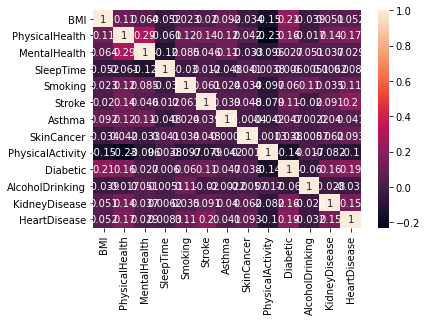

In [131]:
#Mapa de calor heart_bol
sb.heatmap(correlacao,annot=True)

In [30]:
# Resumo sobre as variáveis: Derrame, álcool, doença renal, diabete e cardiopatia. A ideia agora é descobrir 
# se houver a adição de uma ou mais variáveis, aumenta o risco de cardiopatias. Vou construir essa ideia posteriormente,
# cruzando a frequencia de cardiopatia (1) com a frequencias (1) das outras variáveis.
# heart_resumo = pd.read_csv('heart.csv', sep=';')

In [31]:
heart_resumo

,Boleano_Yes_No,Stroke,Alcool,Doenca_renal,Cardiopatia,Diabete
0,Yes,12069,21777,11779,27373,40802
1,No,307726,298018,308016,292422,269653


In [ ]:
# Explorando os dados, observa-se que na amostra de 319795 pessoas: 
# 8,5%  apresenta cardiopatia, 3,7% apresenta histórico de derrame, 
# 6,8% consome álcool, 11,8% apresentam doenças renais e 12,75% apresentam diabetes.
# Abaixo presenta-se os histogramas das variáveis (apenas com a intenção de "clarear as minhas ideias" 
# em relação à possível extração de respostaS)

Text(0.5, 0, 'Cardiopatia')

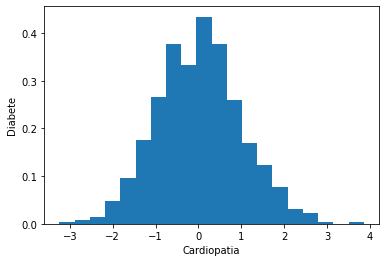

In [38]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(42)
x = np.random.normal(size=1000)
plt.hist(x, density=True, bins=20)  # `density=False` would make counts
plt.ylabel('Diabete')
plt.xlabel('Cardiopatia')

Text(0.5, 0, 'Cardiopatia')

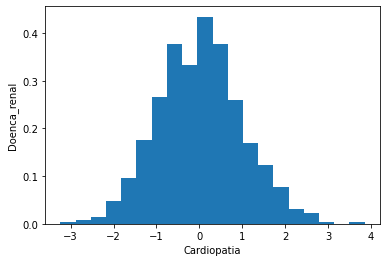

In [39]:
plt.hist(x, density=True, bins=20)  
plt.ylabel('Doenca_renal')
plt.xlabel('Cardiopatia')

Text(0.5, 0, 'Cardiopatia')

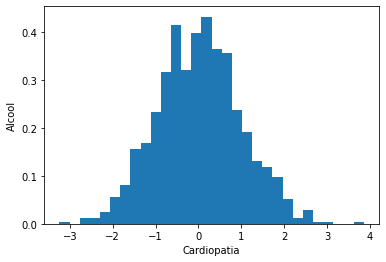

In [40]:
plt.hist(x, density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Alcool')
plt.xlabel('Cardiopatia')

Text(0.5, 0, 'Cardiopatia')

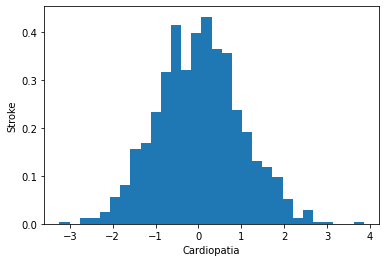

In [41]:
plt.hist(x, density=True, bins=30)
plt.ylabel('Stroke')
plt.xlabel('Cardiopatia')

In [ ]:
# A ideia de continuação do projeto é medir, quantas pessoas apresentam cardiopatia e também são fumantes e/ou
# consomem álcool; apresentam cardiopatia e diabetes, problemas renais ou derrames. 
# E, ainda descobrir de que forma se relacionam (ou não) com a idade e sexo da amostra.  